In [1]:
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/ArneDeloose/Ugain_MachineLearning_DataVis/main/olympic.csv' #raw github link
df=pd.read_csv(url)
df.head()

,m100,long,poid,haut,m400,m110,disq,perc,jave,m1500,score
0,-11.25,7.43,15.48,2.27,-48.90,-15.13,49.28,4.7,61.32,-268.95,8488
1,-10.87,7.45,14.97,1.97,-47.71,-14.46,44.36,5.1,61.76,-273.02,8399
2,-11.18,7.44,14.20,1.97,-48.29,-14.81,43.66,5.2,64.16,-263.20,8328
3,-10.62,7.38,15.02,2.03,-49.06,-14.72,44.80,4.9,64.04,-285.11,8306
4,-11.02,7.43,12.92,1.97,-47.44,-14.40,41.20,5.2,57.46,-256.64,8286


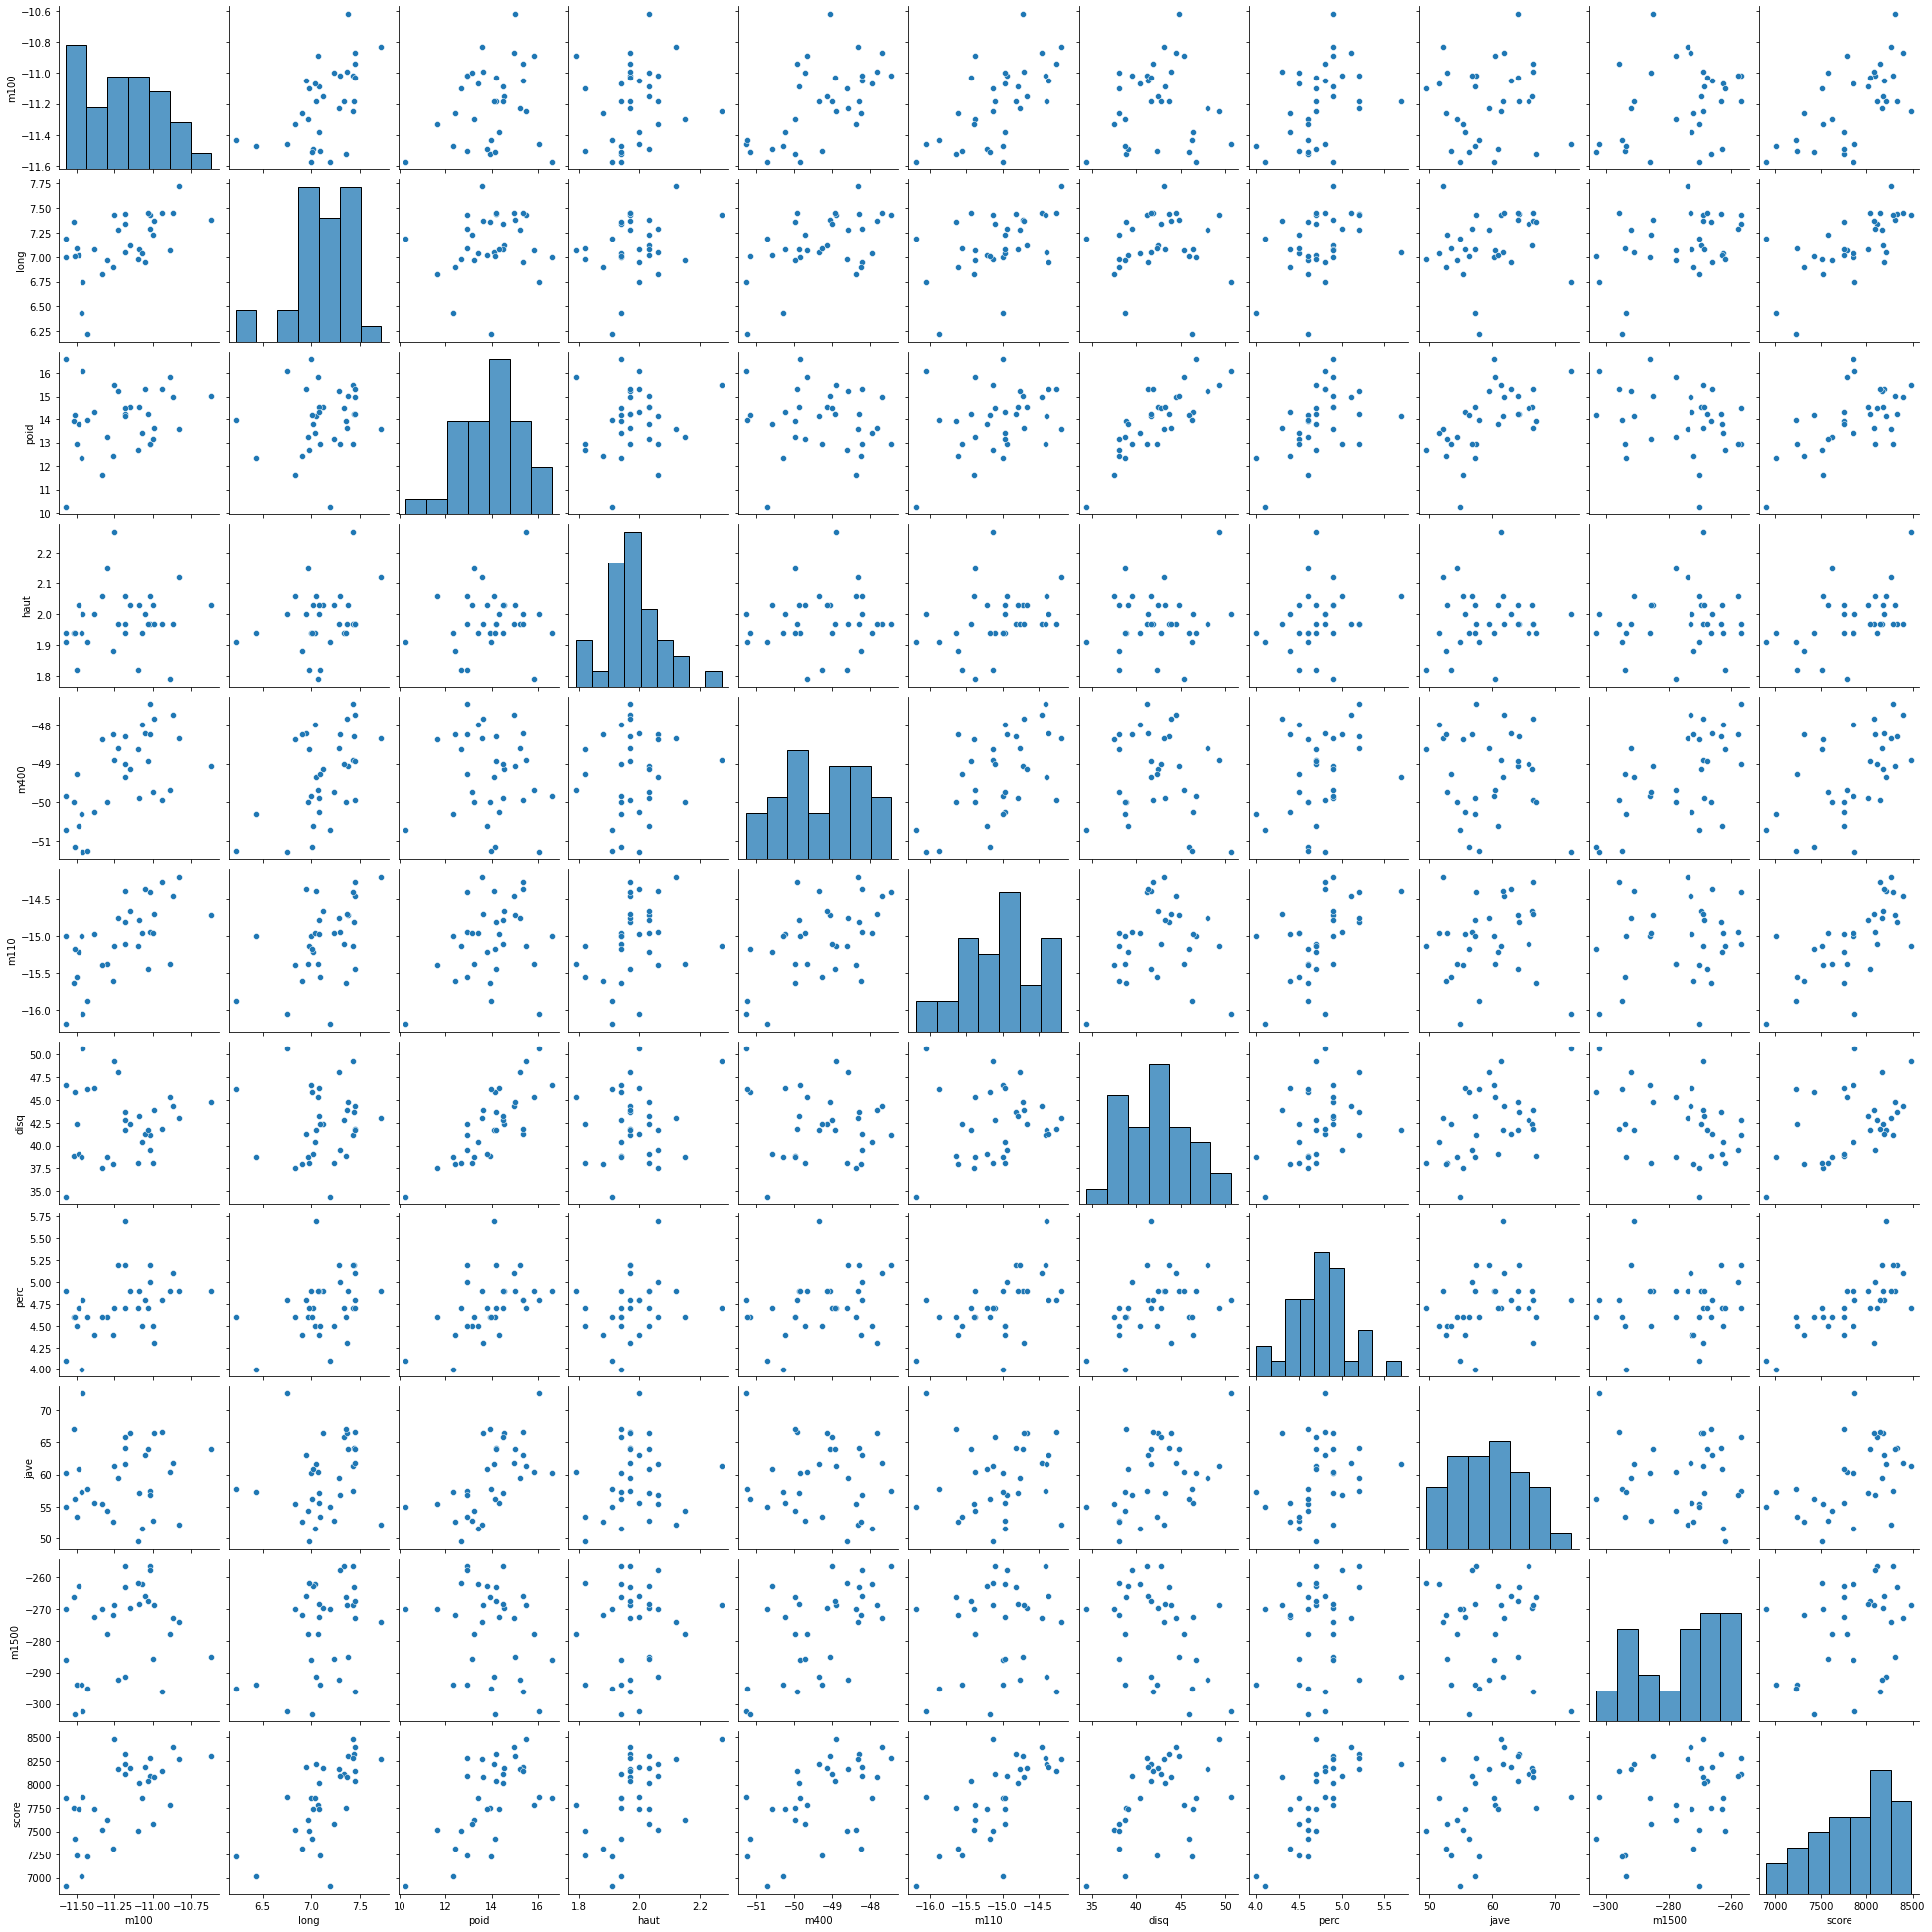

In [3]:
sns.pairplot(df)

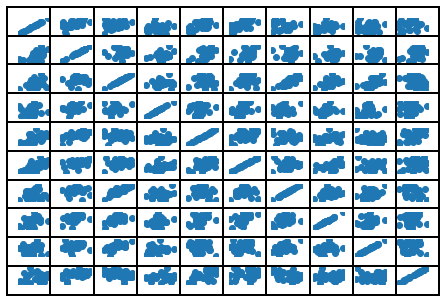

In [4]:
#with for loop scatters
olympic_array=np.array(df.loc[:, 'm100':'m1500'])
num_var=olympic_array.shape[1]

fig, axs = plt.subplots(num_var, num_var)

for i in range(num_var):
    for j in range(num_var):
        axs[i, j].scatter(olympic_array[:, i], olympic_array[:, j])
        axs[i, j].axis('off')
        rect = plt.Rectangle((0.1*i, 0.1*j), 0.10, 0.10, fill=False, color="k", lw=2, zorder=1000, transform=fig.transFigure, figure=fig)
        fig.patches.extend([rect])

plt.tight_layout()
plt.show()

In [5]:
#PCA
X=df.loc[:, 'm100':'m1500']
y=df.loc[:, 'score']

# scale data and fit pca
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

In [6]:
def scree_plot(pca_model):
    PC_values = np.arange(pca_model.n_components_) + 1
    plt.plot(PC_values, pca_model.explained_variance_ratio_, 'ro-', linewidth=2)
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Proportion of Variance Explained')
    return()

In [7]:
def biplot_func(score, pca_model, labels=None, y=None, show_index=False):
    coeff=np.transpose(pca_model.components_[0:2, :]).copy()
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    coeff[:, 0] = coeff[:,0]*xs.std()*np.sqrt(len(xs))
    coeff[:, 1] = coeff[:,1]*ys.std()*np.sqrt(len(ys))
    fig, ax = plt.subplots()
    im = ax.scatter(xs, ys, c = y) #use y as color
    if show_index:
        for i in range(len(xs)):
            ax.text(xs[i], ys[i], i+1)
    if not y is None:
        fig.colorbar(im, ax=ax)
    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i,1], color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            ax.text(1.1*coeff[i,0], 1.1*coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center')           
    ax.set_xlim(1.2*min(np.min(coeff[:, 0]), np.min(xs)), 1.2*max(np.max(coeff[:, 0]), np.max(xs)))
    ax.set_ylim(1.2*min(np.min(coeff[:, 1]), np.min(ys)), 1.2*max(np.max(coeff[:, 1]), np.max(ys)))
    ax.set_xlabel("PC{}".format(1))
    ax.set_ylabel("PC{}".format(2))
    ax.grid()
    return(fig, ax)

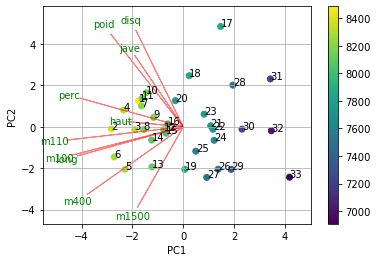

In [8]:
#Call the function with 2 pcs
[fig, ax] = biplot_func(x_new[:, 0:2], pca_model, labels=df.loc[:, 'm100':'m1500'].columns, y=df['score'], show_index=True)

In [9]:
y=df['score']
y

0     8488
1     8399
2     8328
3     8306
4     8286
5     8272
6     8216
7     8189
8     8180
9     8167
10    8143
11    8114
12    8093
13    8083
14    8036
15    8021
16    7869
17    7860
18    7859
19    7781
20    7753
21    7745
22    7743
23    7623
24    7579
25    7517
26    7505
27    7422
28    7310
29    7237
30    7231
31    7016
32    6907
Name: score, dtype: int64

In [10]:
#scores figure
def scores_plot(x_new, y):
    fig, ax = plt.subplots()
    pos1=x_new[:, 0]
    pos2=x_new[:, 1]
    color_score=np.zeros((len(pos1)), )
    for i in range(len(pos1)):
        color_score[i]=(y[i]-min(y))/(max(y)-min(y))
        ax.text(pos1[i], pos2[i], s=y[i])
    ax.scatter(pos1, pos2, c=color_score, cmap='hot')
    return(fig, ax)

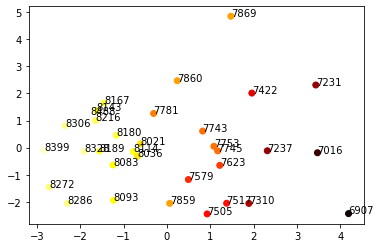

In [11]:
[fig, ax] = scores_plot(x_new, df['score'])

()

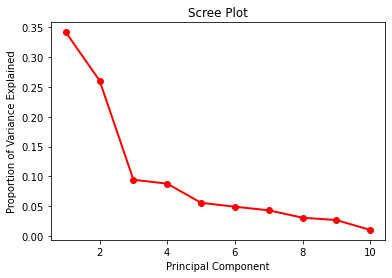

In [12]:
scree_plot(pca_model)

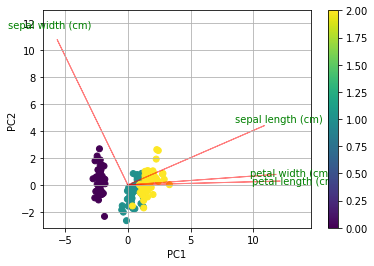

In [18]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# normalise and fit
scaler.fit(X)
X=scaler.transform(X)    
pca_model = PCA()
x_new = pca_model.fit_transform(X)

#Call the function. Use only the 2 PCs.
[fig, ax] = biplot_func(x_new[:, 0:2], pca_model, y=y, labels= iris.feature_names, show_index=False)

()

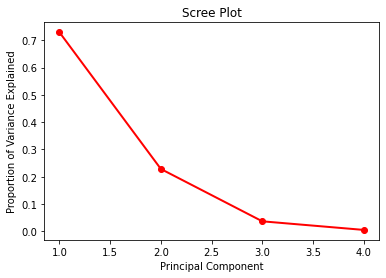

In [19]:
scree_plot(pca_model)